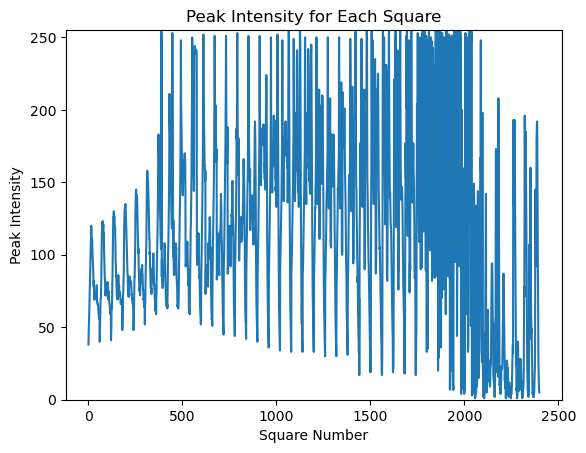

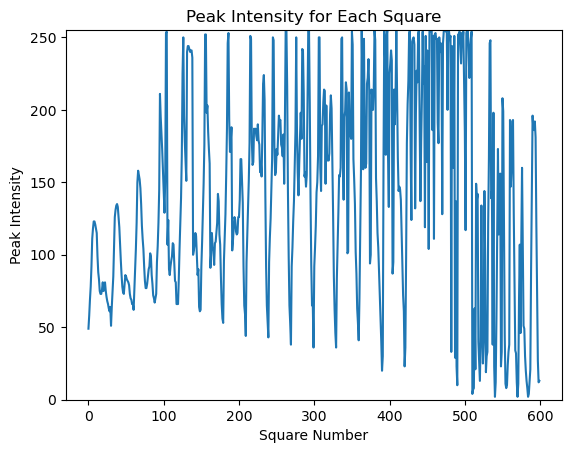

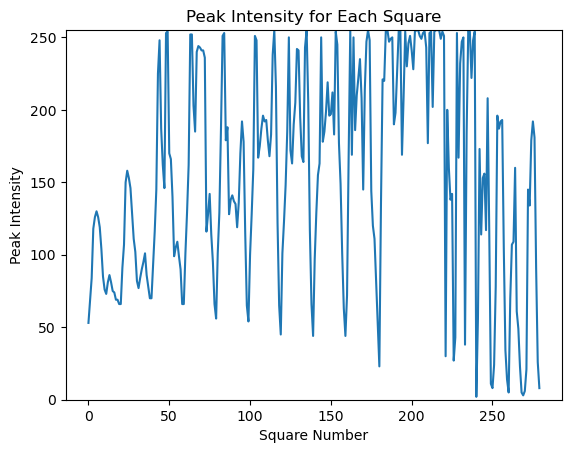

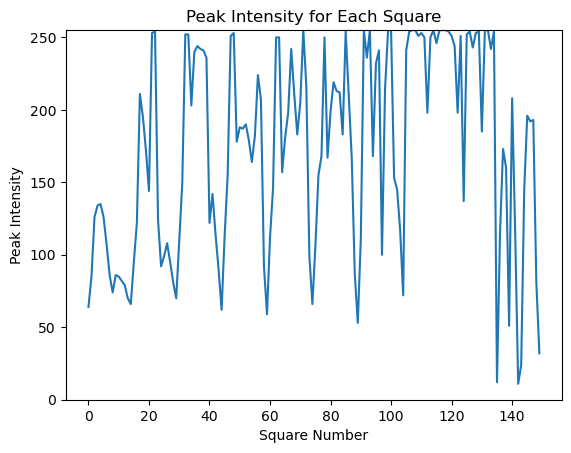

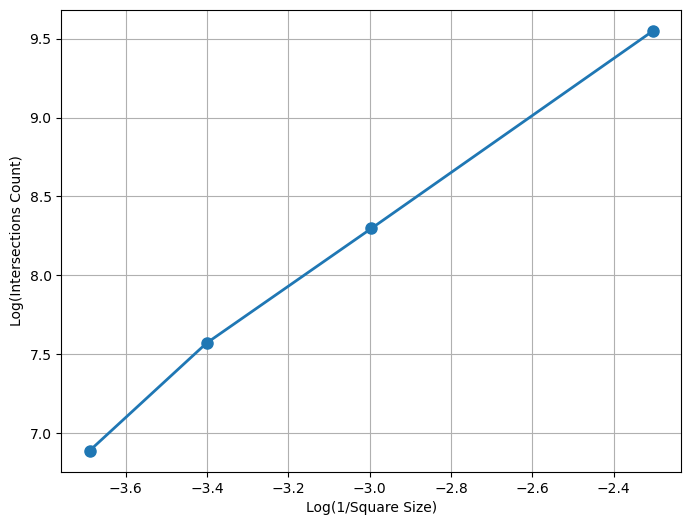

Estimated Fractal Dimension: 1.8907280163045177


In [2]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk, ImageOps
import numpy as np
import matplotlib.pyplot as plt

class App(tk.Frame):
    def __init__(self, parent):
        tk.Frame.__init__(self, parent)
        self._createVariables(parent)
        self._createButton()
        self._createCanvas()

    def _createButton(self):
        self.button = tk.Button(self.parent, text="Choose image", command=self._openImage)
        self.button.grid(row=1, column=0, sticky='w')

    def _openImage(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            self.image = Image.open(file_path).convert("L")  # Convert to grayscale
            self.photo = ImageTk.PhotoImage(self.image)
            self.canvas.create_image(0, 0, anchor='nw', image=self.photo)
            self.parent.geometry(f"{self.image.width}x{self.image.height + 100}")
            self.canvas.config(width=self.image.width, height=self.image.height)
            self.renderGraph()  # Call renderGraph here

    def _createVariables(self, parent):
        self.parent = parent

    def _createCanvas(self):
        self.canvas = tk.Canvas(self.parent, bg="white")
        self.canvas.grid(row=2, column=0, sticky='nsew')

    def renderGraph(self):
        image_array = np.array(self.image)
        height, width = image_array.shape[0], image_array.shape[1]
    
        square_sizes = [10,20,30,40] 
    
        log_box_sizes = []
        log_counts = []
        
    
        for square_size in square_sizes:
            intersections = self.calculateIntersections(image_array, square_size)
            
            if intersections:
                log_box_sizes.append(np.log(1 / square_size))
                log_counts.append(np.log(len(intersections)))
    
        if log_box_sizes and log_counts:
            plt.figure(figsize=(8, 6))
            plt.plot(log_box_sizes, log_counts, 'o-', markersize=8, linewidth=2)
            plt.xlabel('Log(1/Square Size)')
            plt.ylabel('Log(Intersections Count)')
            plt.grid(True)
            plt.show()
    
            # Calculate the slope (fractal dimension)
            slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)
            print(f"Estimated Fractal Dimension: {slope}")
    
    def calculateIntersections(self, image_array, square_size):
        height, width = image_array.shape
        peak_values = [np.max(image_array[i:i+square_size, j:j+square_size]) 
                       for i in range(0, height, square_size) 
                       for j in range(0, width, square_size)]


        
        x = range(len(peak_values))
        y = peak_values

        plt.plot(x, y)
        plt.ylim(0, 255)
    
        plt.xlabel('Square Number')
        plt.ylabel('Peak Intensity')
        plt.title('Peak Intensity for Each Square')
        plt.show()
        
        intersections = []
        intersections = []
        grid_size = 10
        for xi in range(len(peak_values)):
            for yi in range(0, 255, grid_size): 
                for x_point, y_point in zip(x, y):
                    if xi <= x_point < xi + grid_size and yi <= y_point < yi + grid_size:
                        intersections.append((xi, yi))
                        break
    
        return intersections


if __name__ == "__main__":
    root = tk.Tk()
    root.geometry("600x400")
    app = App(root)
    root.mainloop()
